# Personal Projects Human Resource Analytics

Hai i'm Razin Kanz and this is my data analytics personal project

I'm using a dataset that I found from Kaggle about human resource information such as employees demographic, performance score, absence and tardiness rate, etc. The dataset is about an anonymous corporate and was created by Dr. Rich and Dr. Carla Patalano.  

link to kaggle dataset : https://www.kaggle.com/datasets/rhuebner/human-resources-data-set 

in this project i will attempt to :
1. Explore the dataset to understand and identify important variables
2. Create visualization so reader can easily understand important human resource information in this corporate
3. Create and evaluate machine learning models that can predict employees with good performance score

### Exploratory Data Analysis

In [57]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime 
import plotly.express as px

In [58]:
# open the data set

data = pd.read_csv('HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [59]:
# checking variables, null values, and data types

data.info()
data.shape

# it's seems there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

(311, 36)

In [60]:
# trying to understand the data more

data.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [61]:
# trying to understand the data more
# at first glance, the catagorical variables below seems important, so i explore it more
data[['Position', 'State', 'MaritalDesc', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'RecruitmentSource', 'PerformanceScore']].nunique()

Position             32
State                28
MaritalDesc           5
RaceDesc              6
TermReason           18
EmploymentStatus      3
Department            6
RecruitmentSource     9
PerformanceScore      4
dtype: int64

In [62]:
print('Marital Status :',data['MaritalDesc'].unique(),)
print('\n')
print('State :', data['State'].unique())
print('\n')
print('Race :', data['RaceDesc'].unique())
print('\n')
print('Employment Status :', data['EmploymentStatus'].unique())
print('\n')
print('Department :', data['Department'].unique())
print('\n')
print('Recruitment Source :', data['RecruitmentSource'].unique())
print('\n')
print('Performance Score :', data['PerformanceScore'].unique())
print('\n')
print('Citizenship :', data['CitizenDesc'].unique())


Marital Status : ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']


State : ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']


Race : ['White' 'Black or African American' 'Two or more races' 'Asian'
 'American Indian or Alaska Native' 'Hispanic']


Employment Status : ['Active' 'Voluntarily Terminated' 'Terminated for Cause']


Department : ['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


Recruitment Source : ['LinkedIn' 'Indeed' 'Google Search' 'Employee Referral'
 'Diversity Job Fair' 'On-line Web application' 'CareerBuilder' 'Website'
 'Other']


Performance Score : ['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


Citizenship : ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']


In [63]:
print('Reason for Termination :', data['TermReason'].unique())
print('\n')
print('Position :', data['Position'].unique())
print('\n')
print('Manager Name :', data['ManagerName'].unique())



Reason for Termination : ['N/A-StillEmployed' 'career change' 'hours' 'return to school'
 'Another position' 'unhappy' 'attendance' 'performance'
 'Learned that he is a gangster' 'retiring' 'relocation out of area'
 'more money' 'military' 'no-call, no-show' 'Fatal attraction'
 'maternity leave - did not return' 'medical issues' 'gross misconduct']


Position : ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' '

In [64]:
# some people in this corporate are being terminated voluntarily, let's see why

data_vol_ter = data.loc[data['EmploymentStatus'] == 'Voluntarily Terminated']
data_vol_ter['TermReason'].unique()

array(['career change', 'hours', 'return to school', 'Another position',
       'unhappy', 'retiring', 'relocation out of area', 'more money',
       'military', 'maternity leave - did not return', 'performance',
       'medical issues', 'attendance'], dtype=object)

In [65]:
fig = px.histogram(data_vol_ter, x="TermReason",)

fig.update_layout(
    title_text='Reason To Voluntarily Resign',
    xaxis_title_text='Reason',
    yaxis_title_text='', 
)
fig.show()

# 14 people (from 311 total data) are resigning due to unhappiness, maybe corporate should look into it 

In [66]:
# some people in this corporate are being terminated unvoluntarily, let's see why

data_ter_cause = data.loc[data['EmploymentStatus'] == 'Terminated for Cause']
data_ter_cause['TermReason'].unique()

array(['attendance', 'performance', 'Learned that he is a gangster',
       'no-call, no-show', 'Fatal attraction', 'gross misconduct'],
      dtype=object)

In [67]:
fig = px.histogram(data_ter_cause, x="TermReason",)

fig.update_layout(
    title_text='Termination Reason',
    xaxis_title_text='Reason',
    yaxis_title_text='', 
)
fig.show()

# the recruitment team should be more careful :D, don't want more gangster member around

In [68]:
# let's see how the employees are doing in this corporate
 
data[['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount','DaysLateLast30' , 'Absences']].describe()

,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2.977492,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.587072,0.789938,0.909241,2.349421,1.294519,5.852596
min,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,3.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,3.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,4.000000,5.000000,5.000000,8.000000,6.000000,20.000000


### Visualization
#### Corporate Profile

In [69]:
# Let's use visualization to easily understand the corporate state

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [70]:
# how big is this corporate and how manny people are there in each department?

fig = px.histogram(data, x="Department",)

fig.update_layout(
    title_text='Number of people in each department',
    xaxis_title_text='Department',
    yaxis_title_text='', 
)
fig.show()

In [71]:
# are all the employees American Citizen?

fig = px.histogram(data, x="CitizenDesc",)

fig.update_layout(
    title_text='Citizenship',
    xaxis_title_text='Citizenship',
    yaxis_title_text='', 
)
fig.show()

In [72]:
# how diverse is this corporate?

fig = px.histogram(data, x="RaceDesc")

fig.update_layout(
    title_text='Employee Race',
    xaxis_title_text='Race',
    yaxis_title_text='', 
)
fig.show()

#### Corporate Performance 

In [73]:
# are each department have a good performance score?

fig = px.histogram(data, x="Department", y="PerfScoreID", histfunc="avg")

fig.update_layout(
    title_text='Performance Score in Each Department (likert scale 1-4)',
    xaxis_title_text='Department',
    yaxis_title_text='Performance Score', 
)
fig.show()

In [74]:
fig = px.violin(data, x='Department', y="PerfScoreID", box=True, points='all')
fig.update_layout(
    title_text='Performance Score in Each Department (likert scale 1-4)',
    xaxis_title_text='Department',
    yaxis_title_text='Performance Score', 
)

fig.show()

# there are some employee with low performance level, maybe the corporate should look into it

#### Employee's Bad Behaviour

##### Employee's Absence

In [75]:
# Average absence rate in each department

fig = px.histogram(data, x="Department", y="Absences", histfunc="avg")

fig.update_layout(
    title_text='Employees Average Absence Rate in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Average Absence Rate', 
)
fig.show()

In [76]:
# employee's absence rate in each department

fig = px.violin(data, x='Department', y="Absences", points='all')
fig.update_layout(
    title_text='Employees Absence Rate in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Absence Rate', 
)

fig.show()


##### Employee's Tardiness

In [77]:
# Average tardiness rate in each department

fig = px.histogram(data, x="Department", y="DaysLateLast30", histfunc="avg")

fig.update_layout(
    title_text='Employees Average Tardiness Rate in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Average Tardiness Rate', 
)
fig.show()

In [78]:
# employee's tardiness rate in each department

fig = px.violin(data, x='Department', y="DaysLateLast30", points='all')
fig.update_layout(
    title_text='Employees Tardiness Rate in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Tardiness Rate', 
)

fig.show()


##### seems there are plenty low performance and bad employees behaviour reported. Lets look into it more

In [79]:
# Maybe the poor performance are due to the bad manager

fig = px.violin(data, x='ManagerName', y="PerfScoreID", points='all')
fig.update_layout(
    title_text='Performance Score for Each Managers (likert scale 1-4)',
    xaxis_title_text='Manager',
    yaxis_title_text='Performance Score', 
)

fig.show()

# Applause to Simon Roup for didn't have any subordinate with performance score below 3

In [80]:
# Maybe the employees have low engagement level

fig = px.histogram(data, x="Department", y="EngagementSurvey", histfunc="avg")

fig.update_layout(
    title_text='Average Engagement Score in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Average Engagement Score', 
)
fig.show()

In [81]:
# employee's engagement level in each department

fig = px.violin(data, x='Department', y="EngagementSurvey", points='all')
fig.update_layout(
    title_text='Employees Engagement Level in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Engagement Level', 
)

fig.show()


In [82]:
# is engagement level affecting performance level?

fig = px.scatter(data, x="PerfScoreID", y="EngagementSurvey", trendline="ols")
fig.update_layout(
    title_text='Relationship Between Performance Score and Engagement Level',
    xaxis_title_text='Performance Score',
    yaxis_title_text='Engagement Level', 
)

fig.show()

# hmmm... we have positive relationship here 

In [83]:
# is engagement level affecting Absence rate?

fig = px.scatter(data, x="EngagementSurvey", y="Absences", trendline="ols", color='Department')
fig.update_layout(
    title_text='Relationship Between Engagement Level and Absence Rate',
    xaxis_title_text='Engagement Level',
    yaxis_title_text='Absence Rate', 
)

fig.show()

# it's affecting software engineering and admin offices

In [84]:
# is engagement level affecting Tardiness rate?

fig = px.scatter(data, x="EngagementSurvey", y="DaysLateLast30", trendline="ols", color='Department')
fig.update_layout(
    title_text='Relationship Between Engagement Level and Tardiness Rate',
    xaxis_title_text='Engagement Level',
    yaxis_title_text='Tardiness Rate', 
)

fig.show()


# we have negative relationship here 

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning:

invalid value encountered in double_scalars



##### Suggestion : If corporate wants to increase performance level and decrease tardiness rate (and absence rate for Software Engineering and Admin Offices), they should organise training or seminar to increase their employee's engagement level

In [85]:
# Maybe the employees have low satisfaction level

fig = px.histogram(data, x="Department", y="EmpSatisfaction", histfunc="avg")

fig.update_layout(
    title_text='Average Employee satisfaction in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Average Employee Satisfaction Level', 
)
fig.show()

In [86]:
# employee's satisfaction level in each department

fig = px.violin(data, x='Department', y="EmpSatisfaction", points='all')
fig.update_layout(
    title_text='Employees Satisfaction Level in Each Department',
    xaxis_title_text='Department',
    yaxis_title_text='Satisfaction Level', 
)

fig.show()

# some employee have low satisfaction level

In [87]:
# is satisfaction level affecting performance level?

fig = px.scatter(data, x="PerfScoreID", y="EmpSatisfaction", trendline="ols")
fig.update_layout(
    title_text='Relationship Between Employee satisfaction and Performance Score',
    xaxis_title_text='Performance Score',
    yaxis_title_text='Satisfaction Level', 
)

fig.show()

# Yes... we have positive relationship here 

In [88]:
# is satisfaction level affecting absence rate?

fig = px.scatter(data, x="Absences", y="EmpSatisfaction", trendline="ols", color='Department')
fig.update_layout(
    title_text='Relationship Between Employee satisfaction and Absence Rate',
    xaxis_title_text='Absence Rate',
    yaxis_title_text='Satisfaction Level', 
)

fig.show()

# hmm... little to none?

In [89]:
# is satisfaction level affecting tardiness rate?

fig = px.scatter(data, x="EmpSatisfaction", y="DaysLateLast30", trendline="ols", color='Department')
fig.update_layout(
    title_text='Relationship Between Employee satisfaction and Tardiness Rate',
    xaxis_title_text='Satisfaction Level',
    yaxis_title_text='Tardiness Rate', 
)

fig.show()

# mostly negative relationship, but surpraising positive relationship in software engineering department

##### Suggestion : If corporate wants to increase performance level and decrease tardiness rate, they should do something about employee satisfaction level

In [90]:
# but why some employee have low satisfaction level?

# is it because of salary?

fig = px.scatter(data, x="EmpSatisfaction", y="Salary", trendline="ols", color='Department' )
fig.update_layout(
    title_text='Relationship Between Employee Satisfaction and Salary',
    xaxis_title_text='Satisfaction Level',
    yaxis_title_text='Salary level', 
)

fig.show()

# hmm... maybe

In [91]:
# or maybe the employees didn't get enough raise

data[['DateofHire','DateofTermination']].dtypes

DateofHire           object
DateofTermination    object
dtype: object

In [92]:
# need to do a bit of data engineering
data['DateofHire'] = pd.to_datetime(data['DateofHire'], dayfirst=True)
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'], dayfirst=True)

# data.loc[data['Termd'] == 0, 'emplength'] = datetime.now() - data['DateofHire']  
# data.loc[data['Termd'] == 1, 'emplength'] = data['DateofTermination'] - data['DateofHire']

data['hireyear']= data['DateofHire'].dt.year
# data['hiremonth']= data['DateofHire'].dt.month
# data['hireday']= data['DateofHire'].dt.day

data['termyear']= data['DateofTermination'].dt.year
# data['termmonth']= data['DateofTermination'].dt.month
# data['termday']= data['DateofTermination'].dt.day

# comment a few line, maybe i could use it later #

data.loc[data['Termd'] == 0, 'emplengthyear'] = 2022 - data['hireyear'] # I analyze this data set in 2022  
data.loc[data['Termd'] == 1, 'emplengthyear'] = data['termyear'] - data['hireyear']

In [93]:
fig = px.scatter(data, x="emplengthyear", y="Salary", trendline="ols", color='Department')
fig.update_layout(
    title_text='Relationship Between Employment Length and Salary',
    xaxis_title_text='Employment Length (in Year)',
    yaxis_title_text='Salary level', 
)

fig.show()

# Seems the salary growth are low in this corporate, maybe that's why some employees are unsatisfied

In [94]:
# Maybe there are some adverse impact in the corporate

fig = px.histogram(data, x="RaceDesc", y="Salary", histfunc="avg", color='Department')

fig.update_layout(
    title_text='Adverse Impact on Salary Between Race',
    xaxis_title_text='Race',
    yaxis_title_text='Salary', 
)
fig.show()

# some race are getting paid more than the other, some department don't have every races representative

In [95]:
data['Sex'] = data['Sex'].replace(['F'], 'Female')
data['Sex'] = data['Sex'].replace(['M '], 'Male')

fig = px.histogram(data, x="Sex", y="Salary", histfunc="avg", color='Department')

fig.update_layout(
    title_text='Adverse Impact on Salary Between Gender',
    xaxis_title_text='Gender',
    yaxis_title_text='Salary', 
)
fig.show()

# relatively low salary difference between male and female employees, but executive office are female dominated

##### More About Employee Performance
###### Let's see more variables that maybe effecting employee performance

In [96]:
# Is marital status effecting employee performance?

fig = px.histogram(data, x="MaritalDesc", y="PerfScoreID", histfunc="avg", color='Department')

fig.update_layout(
    title_text='Average Performance Level and Marital Status',
    xaxis_title_text='Marital Status',
    yaxis_title_text='Average Performance Level', 
)
fig.show()

In [97]:
fig = px.violin(data, x='MaritalDesc', y="PerfScoreID", points='all')
fig.update_layout(
    title_text='Performance Score and Marital Status',
    xaxis_title_text='Marital Status',
    yaxis_title_text='Performance Score', 
)

fig.show()

# widowed employee didn't have low performace record

In [98]:
# is employee age when recruited affecting employee performance?

# another little data engineering
data['DOB'] = pd.to_datetime(data['DOB'], dayfirst=True)

data['age_year'] = data['DOB'].dt.year
data['age_rec'] = data['hireyear'] - data['age_year'] 

data[['age_rec', 'DOB', 'age_year', 'hireyear']].tail(10)

# that's weird, some ages have negative values
# looks like error in data entry process (1965 become 2065)

,age_rec,DOB,age_year,hireyear
301,-54,2065-09-09,2065,2011
302,28,1983-07-30,1983,2011
303,-57,2069-02-10,2069,2012
304,-45,2058-07-11,2058,2013
305,29,1985-04-20,1985,2014
306,29,1985-11-05,1985,2014
307,26,1982-04-05,1982,2008
308,31,1979-08-30,1979,2010
309,36,1979-02-24,1979,2015
310,36,1978-08-17,1978,2014


In [99]:
# Let's fix that real quick

data.loc[data['age_rec'] < 0, 'age_year'] = data['age_year'] - 100   

data['age_rec'] = data['hireyear'] - data['age_year'] 

data[['age_rec', 'DOB', 'age_year', 'hireyear']].tail(10)


,age_rec,DOB,age_year,hireyear
301,46,2065-09-09,1965,2011
302,28,1983-07-30,1983,2011
303,43,2069-02-10,1969,2012
304,55,2058-07-11,1958,2013
305,29,1985-04-20,1985,2014
306,29,1985-11-05,1985,2014
307,26,1982-04-05,1982,2008
308,31,1979-08-30,1979,2010
309,36,1979-02-24,1979,2015
310,36,1978-08-17,1978,2014


In [100]:
fig = px.histogram(data, x="age_rec", y="PerfScoreID", histfunc="avg")

fig.update_layout(
    title_text='Trend Between Employees Age When Recruited and Performance Score',
    xaxis_title_text='Employmee Age (When Recruited)',
    yaxis_title_text='Performance Score', 
)
fig.show()

# hmm relatively stagnan trend

In [101]:
# Let's see if media recruitment affecting employee performace

fig = px.histogram(data, x="RecruitmentSource", y="PerfScoreID", histfunc="avg", color='Department')

fig.update_layout(
    title_text='Average Performance Level and Recruitment Sources',
    xaxis_title_text='Recruitment Sources',
    yaxis_title_text='Average Performance Level', 
)
fig.show()

In [102]:
fig = px.violin(data, x='RecruitmentSource', y="PerfScoreID", points='all')
fig.update_layout(
    title_text='Performance Score and Recruitment Sources',
    xaxis_title_text='Recruitment Sources',
    yaxis_title_text='Performance Score', 
)

fig.show()

# looks like employee referral is a good way to recruit employees with hight performance score
# and maybe On-line web application too, but the sample is too small to determined that

### Modeling
#### Let's build machine learning model that can predict employee performance

###### Inputs variables :
###### 1. Recruitment Sources
###### 2. Citizenship
###### 3. Employees Races
###### 4. Employees Ages (When Recruited)
###### 5. Employee Marital Status
###### 6. Gender
###### 7. Department

In [117]:
# import the library used for modeling and evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# we'll be using decision tree and random forest algorithm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Create input and target variables

input = data[['RecruitmentSource','CitizenDesc','RaceDesc', 'age_rec','MaritalStatusID', 'GenderID', 'Department']]
target = data['PerfScoreID']

data[['PerfScoreID', 'RecruitmentSource','CitizenDesc','RaceDesc', 'age_rec','MaritalStatusID', 'GenderID', 'Department']]

,PerfScoreID,RecruitmentSource,CitizenDesc,RaceDesc,age_rec,MaritalStatusID,GenderID,Department
0,4,LinkedIn,US Citizen,White,28,0,1,Production
1,3,Indeed,US Citizen,White,40,1,1,IT/IS
2,3,LinkedIn,US Citizen,White,23,1,0,Production
3,3,Indeed,US Citizen,White,20,1,0,Production
4,3,Google Search,US Citizen,White,22,2,0,Production
...,...,...,...,...,...,...,...,...
306,3,LinkedIn,US Citizen,White,29,0,1,Production
307,1,Google Search,US Citizen,Asian,26,0,0,Production
308,4,Employee Referral,US Citizen,White,31,0,0,IT/IS
309,3,Employee Referral,US Citizen,White,36,0,0,IT/IS


In [109]:
# labeling the inputs

label_RecruitmentSource = LabelEncoder()
label_CitizenDesc = LabelEncoder()
label_RaceDesc = LabelEncoder()
label_Department = LabelEncoder()

input['RecruitmentSource_label'] = label_RecruitmentSource.fit_transform(input['RecruitmentSource'])
input['CitizenDesc_label'] = label_RecruitmentSource.fit_transform(input['CitizenDesc'])
input['RaceDesc_label'] = label_RecruitmentSource.fit_transform(input['RaceDesc'])
input['Department_label'] = label_RecruitmentSource.fit_transform(input['Department'])

inputs = input.drop(['RecruitmentSource', 'CitizenDesc', 'RaceDesc', 'Department'], axis='columns') 
inputs

<ipython-input-109-9857d41b4640>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-9857d41b4640>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-9857d41b4640>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-98

,age_rec,MaritalStatusID,GenderID,RecruitmentSource_label,CitizenDesc_label,RaceDesc_label,Department_label
0,28,0,1,5,2,5,3
1,40,1,1,4,2,5,2
2,23,1,0,5,2,5,3
3,20,1,0,4,2,5,3
4,22,2,0,3,2,5,3
...,...,...,...,...,...,...,...
306,29,0,1,5,2,5,3
307,26,0,0,3,2,1,3
308,31,0,0,2,2,5,2
309,36,0,0,2,2,5,2


In [113]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size= 0.2)

In [124]:
# Decision Tree Modeling

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

# Evaluation
model_dt_score = model_dt.score(X_test, y_test)
model_dt_report = classification_report(y_test,y_pred_dt)
model_dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

print(model_dt_score)
print(model_dt_report)
print(model_dt_confusion_matrix)

# 0.65 that's pretty good

0.6507936507936508
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.82      0.79      0.80        52
           4       0.00      0.00      0.00         7

    accuracy                           0.65        63
   macro avg       0.20      0.20      0.20        63
weighted avg       0.68      0.65      0.66        63

[[ 0  0  1  0]
 [ 0  0  3  0]
 [ 2  5 41  4]
 [ 0  2  5  0]]


In [134]:
# Decision Tree Modeling

model_rf = RandomForestClassifier(n_estimators=50) # i tried a few estimators and found 50 is probably the best
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Evaluation
model_rf_score = model_rf.score(X_test, y_test)
model_rf_report = classification_report(y_test,y_pred_rf)
model_rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

print(model_rf_score)
print(model_rf_report)
print(model_rf_confusion_matrix)

# 0.80 that's even better

0.8095238095238095
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.85      0.98      0.91        52
           4       0.00      0.00      0.00         7

    accuracy                           0.81        63
   macro avg       0.21      0.25      0.23        63
weighted avg       0.70      0.81      0.75        63

[[ 0  0  1  0]
 [ 0  0  3  0]
 [ 0  1 51  0]
 [ 0  2  5  0]]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###### but there is something peculiar about the confusion matrix


In [156]:
data[['PerfScoreID', 'PerformanceScore']].sample(n = 10)

# Performance Score
# 1 = PIP
# 2 = Need Improvement
# 3 = Fully Meets
# 4 = Exceeds

,PerfScoreID,PerformanceScore
200,3,Fully Meets
215,2,Needs Improvement
86,2,Needs Improvement
67,1,PIP
117,3,Fully Meets
139,3,Fully Meets
48,3,Fully Meets
55,4,Exceeds
24,3,Fully Meets
220,4,Exceeds


Text(42.0, 0.5, 'Actual')

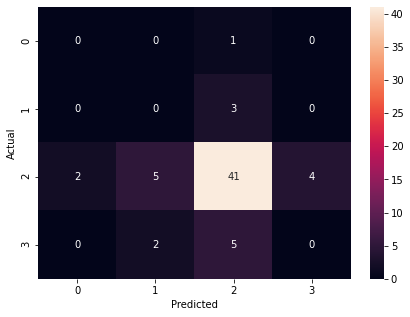

In [158]:
# Decision Tree confusion matrix visualization

plt.figure (figsize=(7,5))
sns.heatmap(model_dt_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# it's only good at predicting employees with "Fully Meets" performance level

Text(42.0, 0.5, 'Actual')

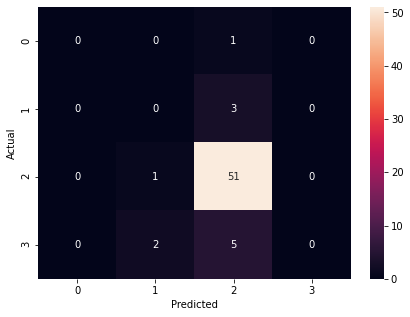

In [157]:
# Random Forrest confusion matrix visualization

plt.figure (figsize=(7,5))
sns.heatmap(model_rf_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


# it's only good at predicting employees with "Fully Meets" performance level

In [146]:
fig = px.histogram(data, x="PerformanceScore",)

fig.update_layout(
    title_text='Employees Performace Score Distribution',
    xaxis_title_text='Performance Score',
    yaxis_title_text='', 
)
fig.show()

# maybe it's because we don't have enough employees performance data for "Exceeds", "Need Improvement", and "PIP" 